# Probabilistic Robotics for State Estimation

Probabilistic robotics is a framework that deals with uncertainty in robot perception and action by using probability theory. It's especially valuable for state estimation - determining where a robot is and what's around it in uncertain environments.

## Core Concept

The fundamental idea is that a robot's belief about its state (position, orientation, etc.) and the environment is represented as a probability distribution rather than as single, deterministic values. This approach acknowledges the inherent uncertainty in:

1. **Sensor measurements** (noise, limited range, occlusions)
2. **Motion actions** (wheel slippage, uneven terrain)
3. **Environment dynamics** (moving objects, changing conditions)



## Mathematical Framework

The mathematical foundation lies in Bayesian probability theory, where we update beliefs based on new evidence.

### Bayes' Rule

$$
p(x|z) = \frac{p(z|x) \cdot p(x)}{p(z)}
$$

Where:
- $p(x)$ is the prior belief about state $x$
- $p(z|x)$ is the likelihood of getting measurement $z$ given state $x$
- $p(x|z)$ is the posterior belief after incorporating measurement $z$
- $p(z)$ is a normalizing factor



### State Estimation Process

State estimation typically follows these steps:

1. **Prediction Step (Motion Model)**: When a robot moves, uncertainty increases.
   
   $$p(x_t|u_t,x_{t-1}) $$
   
   This transition model describes how state $x$ changes when control $u$ is applied.

2. **Update Step (Measurement Model)**: When sensors provide data, uncertainty decreases.
   
   $$p(z_t|x_t)$$
   
   This sensor model describes the probability of getting measurement $z$ in state $x$.

3. **Belief Update**: Combining the above using Bayes' rule.
   
   $$bel(x_t) = \eta \cdot p(z_t|x_t) \int p(x_t|u_t,x_{t-1}) \cdot bel(x_{t-1}) \, dx_{t-1}$$
   
   Where $\eta$ is a normalizing constant and $bel(x_t)$ is the belief at time $t$.



## Common Algorithms

1. **Kalman Filter**: For linear systems with Gaussian noise.
2. **Extended Kalman Filter (EKF)**: For nonlinear systems, using linearization.
3. **Particle Filter**: For arbitrary distributions, using sampling.
4. **Histogram Filter**: For discrete state spaces.



## Simple Example: Robot Localization

Let's consider a simple 1D robot moving along a line, with:
- A motion model that attempts to move forward 1 unit each step but has noise
- A sensor that can detect a pole in the tunnel with some uncertainty

### Initial Belief
The robot starts with a uniform belief about its position - it could be anywhere with equal probability.

### Prediction Step
The robot attempts to move forward 1 unit by applying motor controls. Due to uncertainty in motion:
- If it's at position $x$ now, it might end up at $x+0.8$, $x+1.0$, or $x+1.2$ with different probabilities
- This "smears" the belief forward and increases uncertainty

Mathematically:
$$bel^-(x_t) = \int p(x_t|u_t,x_{t-1}) \cdot bel(x_{t-1}) \, dx_{t-1}$$

### Update Step
The robot takes a sensor measurement and detects a pole 2 metres away, but with some uncertainty.

If the sensor is perfect, positions exactly 2 units from the pole would have probability 1.0, and all others 0.0. But with noise:
- Positions 1.8-2.2 units from the pole might have high probability
- Positions further away have lower probability

Mathematically:
$$bel(x_t) = \eta \cdot p(z_t|x_t) \cdot bel^-(x_t)$$

### Result
After combining the prediction and update, the robot has a revised belief about its position - typically a sharper, more certain distribution than before.



## Particle Filter Implementation Example

A particle filter would represent this belief using discrete samples (particles):


This simple example demonstrates how a robot can:
1. Start with high uncertainty
2. Move and increase uncertainty further
3. Take measurements to reduce uncertainty
4. Combine these to arrive at a better state estimate

This probabilistic approach allows robots to function effectively despite the uncertainty inherent in real-world environments.

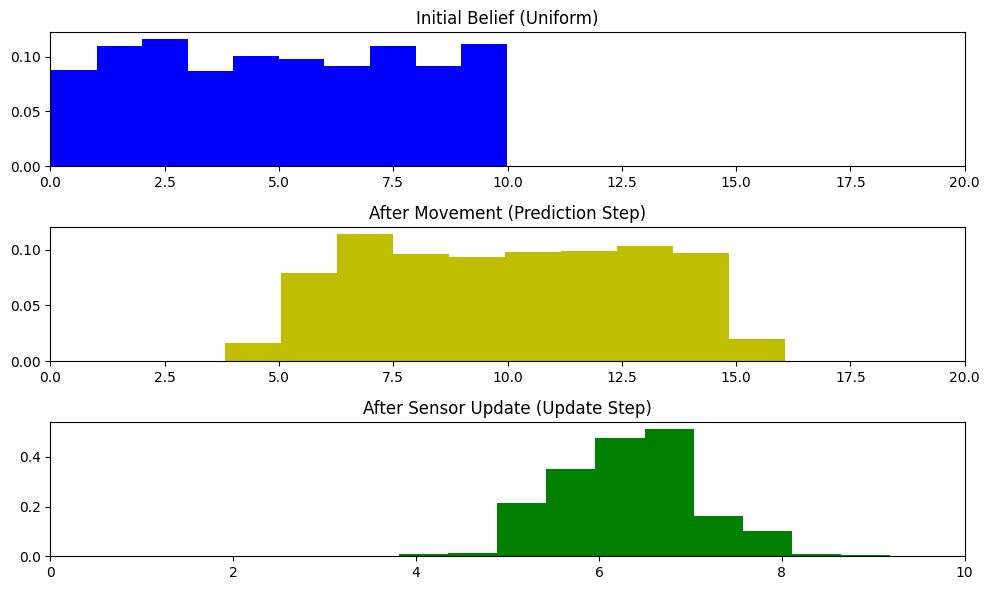

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize particles (positions) with uniform distribution
num_particles = 1000
particles = np.random.uniform(0, 10, num_particles)  # Robot could be anywhere from 0-10

# Motion model: Move forward with noise
def move_particles(particles, move_distance=1.0, noise_std=0.2):
    return particles + move_distance + np.random.normal(0, noise_std, len(particles))

# Sensor model: Pose detection with noise
def weight_particles(particles, pole_distance=8.0, measurement=2.0, noise_std=0.3):
    # Calculate expected measurement for each particle
    expected_measurements = pole_distance - particles
    # Weight based on how well measurement matches expectation
    weights = np.exp(-0.5 * ((expected_measurements - measurement) / noise_std)**2)
    return weights / sum(weights)  # Normalize weights

# Simulation loop
plt.figure(figsize=(10, 6))

# Initial belief
plt.subplot(3, 1, 1)
plt.hist(particles, bins=10, color='b', density=True)
plt.title("Initial Belief (Uniform)")
plt.xlim(0, 20)

# After movement
particles = move_particles(particles, move_distance=5.0, noise_std=0.5)
plt.subplot(3, 1, 2)
plt.hist(particles, bins=10, density=True, color='y')
plt.title("After Movement (Prediction Step)")
plt.xlim(0, 20)

# After sensor update
weights = weight_particles(particles, pole_distance=8.0, measurement=2.0, noise_std=0.9)
# Resample particles based on weights
resampled_indices = np.random.choice(range(num_particles), num_particles, p=weights)
particles = particles[resampled_indices]

plt.subplot(3, 1, 3)
plt.hist(particles, bins=10, color='g', density=True)
plt.title("After Sensor Update (Update Step)")
plt.xlim(0, 10)

plt.tight_layout()
plt.show()